In [2]:
import torch

# Define the coefficients of the polynomial as a tensor with requires_grad=True
coefficients = torch.tensor([0.,0.,0.,0.], requires_grad=True)  # Example: 1*x^2 - 3*x + 2

# Define the polynomial function
def polynomial(x, coeffs):
    return coeffs[0] + x * coeffs[1] + x**2 * coeffs[2] + x**3 * coeffs[3]


Epoch 0, Loss 51.81388466421908 [-0.00897691 -0.16834003 -0.16664828 -0.14144216 -0.11657266 -0.09604457
 -0.07978719]
Epoch 1000, Loss 5.0677172951465845 [ 0.6191958   1.6344634  -4.456559   -3.094029   -0.35019514  2.038784
  3.7796886 ]
Epoch 2000, Loss 3.8072055328049195 [ 0.43861812  3.0204556  -5.974797   -3.958493   -0.28245664  2.621272
  4.472878  ]
Epoch 3000, Loss 3.5215066070768 [ 0.36759323  3.626409   -6.850877   -4.152117    0.02541175  2.9354897
  4.434954  ]
Epoch 4000, Loss 3.360154192071543 [ 0.33464202  3.9592144  -7.494281   -4.1178164   0.40738764  3.1538677
  4.153201  ]
Epoch 5000, Loss 3.221384810513487 [ 0.31508943  4.193915   -8.046666   -4.008311    0.8064569   3.3360028
  3.7955046 ]
Epoch 6000, Loss 3.0926148693371776 [ 0.30041647  4.3910027  -8.557211   -3.876181    1.2032077   3.50255
  3.4195294 ]
Epoch 7000, Loss 2.9718943322229703 [ 0.2876735  4.5714836 -9.043229  -3.739467   1.5911975  3.6607347
  3.0449302]
Epoch 8000, Loss 2.8585707367902913 [ 0.27

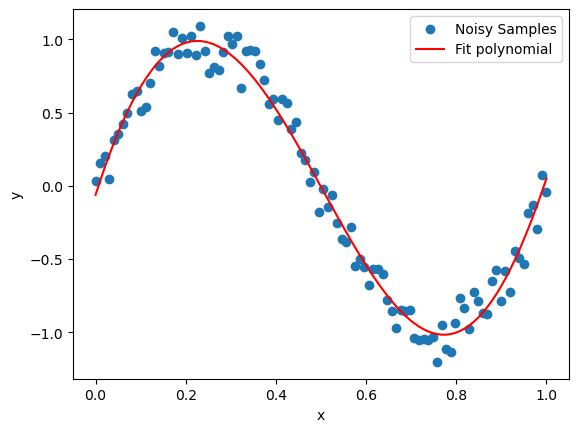

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model (in our case, its y = A*x + b)
class PolynomialLayer(nn.Module):
    def __init__(self):
        super(PolynomialLayer, self).__init__()
        # Random guess for parameters A and B
        self.Porder = 6
        self.coeffs = nn.parameter.Parameter(torch.zeros(self.Porder+1, requires_grad=True))


    def forward(self, x):
        basis = torch.stack([x**i for i in range(self.Porder+1)], dim=1)
        return torch.matmul(basis, self.coeffs)
        # return self.coeffs[0] + self.coeffs[1] * x + self.coeffs[2] * x**2 + self.coeffs[3] * x**3


# Generate noisy samples of a sine function on the unit interval [0, 1]
x_samples = torch.linspace(0, 1, steps=100)
y_samples = torch.sin(2 * np.pi * x_samples) + np.random.normal(0, 0.1, x_samples.size())
# y_samples = 3.0*x_samples + np.random.normal(0, 0.1, x_samples.size())

# Create the model and optimizer
model = PolynomialLayer()
optimizer = optim.SGD(model.parameters(), lr=0.005)

num_epochs = 100000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_samples)
    loss = torch.sum((outputs - y_samples) ** 2)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch {}, Loss {}'.format(epoch, loss.item()),model.coeffs.detach().numpy())


# # Plot the noisy samples
plt.scatter(x_samples.numpy(), y_samples, label='Noisy Samples')
plt.plot(x_samples.numpy(), model(x_samples).detach().numpy(), label='Fit polynomial', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

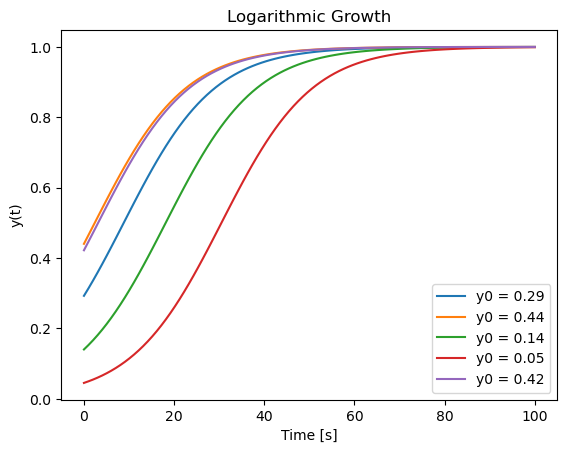

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equation for logarithmic growth
def log_growth(y, t, k):
    return k * y*(1.0-y)

# Set initial conditions and parameters
y0 = 0.1  # Initial value (must be > 1 to avoid log(0))
k = 0.1   # Growth rate constant

# Time points
t = np.linspace(0, 100, 100)

# Integrate the equation
solution = odeint(log_growth, y0, t, args=(k,))

# Plot the results
plt.figure()
for i in range(5):
    y0 = np.random.rand()
    solution = odeint(log_growth, y0, t, args=(k,))
    plt.plot(t, solution, label='y0 = {:.2f}'.format(y0))
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('y(t)')
plt.title('Logarithmic Growth')
plt.show()

In [7]:
# generate a dataset consisting of many profiles for different initial conditions
def getDataset(Ndata):
    def log_growth(y, t, k):
        return k * y*(1.0-y)

    # Set initial conditions and parameters
    y0 = 0.1  # Initial value (must be > 1 to avoid log(0))
    k = 0.1   # Growth rate constant

    # Time points
    t = np.linspace(0, 100, 200)

    # Integrate the equation
    datasetList = []
    for i in range(Ndata):
        y0 = np.random.rand()
        datasetList.append(odeint(log_growth, y0, t, args=(k,))[:,0]+np.random.normal(0, 0.005, t.size))
    return t, np.array(datasetList)

Ndata = 20
time, dataset = getDataset(Ndata)
print(dataset.shape)

(20, 200)


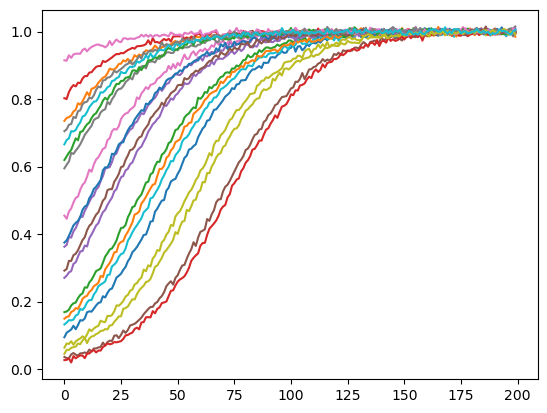

In [8]:
plt.plot(dataset.T)

In [9]:
# Calculate time derivative of dataset
def calculateDerivative(dataset):
    derivative = np.zeros_like(dataset)
    dt = time[1] - time[0]
    for i in range(dataset.shape[0]):
        for j in range(1, dataset.shape[1]):
            derivative[i, j] = (dataset[i, j] - dataset[i, j-1]) / dt
    return derivative

dydt = calculateDerivative(dataset)

In [10]:
dataset.shape

(20, 200)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model (in our case, its y = A*x + b)
class PopulationModel(nn.Module):
    def __init__(self):
        super(PopulationModel, self).__init__()
        # Random guess for parameters A and B
        self.parameter = nn.parameter.Parameter(torch.tensor(0.0),requires_grad=True)


    def forward(self, x):
        return self.parameter*x*(1.0-x)

modelinput = torch.tensor(dataset,dtype=torch.float32)
model = PopulationModel()
optimizer = optim.Adam(model.parameters(), lr=0.005)
model(modelinput[0,:])

num_epochs = 100000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    # choose a random solution from the dataset
    dataindex = np.random.randint(0,Ndata)
    modelinput = torch.tensor(dataset[dataindex,:],dtype=torch.float32)
    modeloutput = model(modelinput)
    #take derivative of dataset
    loss = torch.sum((modeloutput-torch.tensor(dydt[dataindex]))**2)
    # loss = torch.sum((modeloutput - dydt[dataindex]) ** 2)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch {}, Loss {}'.format(epoch, loss.item()),model.parameter.detach().numpy())


# # # Plot the noisy samples
# plt.scatter(x_samples.numpy(), y_samples, label='Noisy Samples')
# plt.plot(x_samples.numpy(), model(x_samples).detach().numpy(), label='Fit polynomial', color='red')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()

Epoch 0, Loss 0.07285181563005198 0.005
Epoch 1000, Loss 0.03522971263189884 0.096985996
Epoch 2000, Loss 0.03769517129282629 0.09279659
Epoch 3000, Loss 0.03987985306018997 0.093085445
Epoch 4000, Loss 0.045471480301645786 0.09645063
Epoch 5000, Loss 0.05585749895764457 0.09772242
Epoch 6000, Loss 0.038242547438056815 0.095585756
Epoch 7000, Loss 0.03989887869712974 0.094063684
Epoch 8000, Loss 0.034397351270385824 0.093255006
Epoch 9000, Loss 0.03765181070954627 0.0983778
Epoch 10000, Loss 0.041374310723703345 0.09740939
Epoch 11000, Loss 0.03971420383298613 0.08420792
Epoch 12000, Loss 0.03764726717272517 0.09655745
Epoch 13000, Loss 0.045741216032658245 0.09475707
Epoch 14000, Loss 0.03942911525639847 0.09777454
Epoch 15000, Loss 0.04546948956925524 0.094801605
Epoch 16000, Loss 0.05574582967301546 0.09349444
Epoch 17000, Loss 0.04058922725339751 0.09264603
Epoch 18000, Loss 0.0457101689979337 0.09466033
Epoch 19000, Loss 0.041405147014999824 0.09626916
Epoch 20000, Loss 0.04143555

In [18]:
import torch.nn as nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Neural network with one hidden layer of 20 neurons with tanh activation
        self.hidden = nn.Sequential(
            nn.Linear(1, 20),
            nn.Tanh(),
            nn.Linear(20, 20),
            nn.Tanh(),
            nn.Linear(20, 1)
        )


    def forward(self, x):
        return self.hidden(x)
    
# Generate noisy samples of a sine function on the unit interval [0, 1]
x_samples = torch.linspace(0, 1, steps=100)
y_samples = torch.sin(2 * np.pi * x_samples) + np.random.normal(0, 0.1, x_samples.size())
# y_samples = 3.0*x_samples + np.random.normal(0, 0.1, x_samples.size())

# Create the model and optimizer
model = NeuralNetwork()
optimizer = optim.Adam(model.parameters(), lr=0.005)

num_epochs = 100000
listoffits = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_samples.unsqueeze(1))
    loss = torch.sum((outputs.squeeze() - y_samples) ** 2)
    loss.backward()
    optimizer.step()

    if epoch % 20000 == 0:
        print('Epoch {}, Loss {}'.format(epoch, loss.item()))
        listoffits.append(outputs.detach().numpy())

Epoch 0, Loss 49.58833080613974
Epoch 20000, Loss 0.5197220450701746
Epoch 40000, Loss 0.4552180636874428
Epoch 60000, Loss 0.40450582453822825
Epoch 80000, Loss 0.3909248912862726


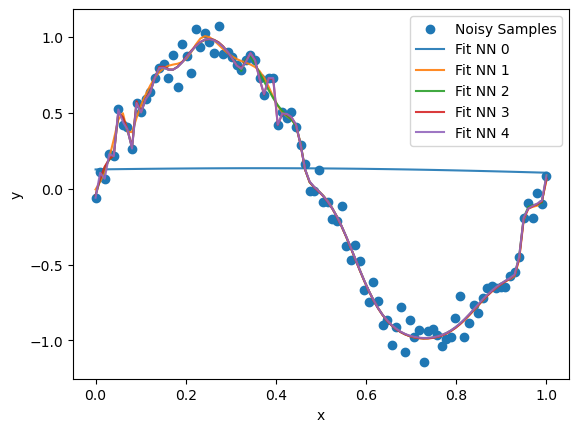

In [19]:
# visualize the results
plt.scatter(x_samples.numpy(), y_samples, label='Noisy Samples')
# plt.plot(x_samples.numpy(), model(x_samples.unsqueeze(1)).detach().numpy(), label='Fit neural network', color='red')
for i in range(len(listoffits)):
    plt.plot(x_samples.numpy(), listoffits[i], label=f'Fit NN {i}', alpha=0.9)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
